In [1]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version은 코랩 명령입니다.
    %tensorflow_version 2.x
except Exception:
    pass

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 12.2 넘파이처럼 텐서플로 사용하기

## 12.2.1 텐서와 연산

* tf.constant() 함수로 텐서를 만들 수 있다.

In [2]:
#두 개의 행과 세 개의 열을 가진 실수 행렬을 나타내는 텐서
tf.constant([[1., 2., 3.] , [4., 5., 6.,]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
#스칼라
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1., 2., 3.] , [4., 5., 6.,]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


* 인덱싱

In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

* 연산

In [7]:
#tf.add(t, 10)
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

* keras.backend 사용하기

In [10]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

## 12.2.2 텐서와 넘파이

* 넘파이 배열로 텐서를 만들 수 있고, 그 반대도 가능하다.
* 넘파이 배열에 텐서플로 연산을 적용할 수 있고, 턴세에 넘파이 연산을 적용할 수도 있다.

In [11]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [12]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [13]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [14]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## 12.2.3 타입 변환

* 타입 변환은 성능을 크게 감소시킬 수 있다.
* 따라서 텐서플로는 어떤 타입 변환도 자동으로 수행하지 않는다. 또한 호환되지 않는 타이븨 텐서로 연산을 실행하면 예외가 발생한다.

In [15]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [16]:
tf.constant(2.) + tf.constant(40., dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]

In [17]:
#tf.cast() : 타입 변환 함수
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

* 문자열
 - tf.string타입의 텐서
 - 유니코드가 아니라 바이트 문자열을 나타낸다.

In [18]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [19]:
#자동으로 UTF-8로 인코딩
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [20]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [21]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [22]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

* 문자열 배열

In [23]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [24]:

tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [25]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [26]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


* 레그드 텐서
 - 텐서의 리스트
 - 텐서에 포함된 값은 동일한 데이터 타입을 가져야 하지만 리스트의 길이는 다를 수 있다.

In [27]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [28]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [29]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [30]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [31]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [32]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

* 희소텐서
 - 대부분 0으로 채워진 텐서를 효율적으로 나타낸다

In [33]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [34]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [35]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [36]:
s2 = s * 2.0

In [37]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [38]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [39]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [40]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [41]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

* 집합
 - 일반적인 텐서로 나타낸다.
 - 각 집합은 텐서의 마지막 축에 있는 벡터에 의해 표현된다.

In [42]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [43]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [44]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

## 12.2.4 변수

* 지금까지의 tf.Tensor는 변경이 불가능한 객체이다.
 - 따라서 일반적인 텐서로는 역전파로 변경되어야 하는 신경망의 가중치를 구현할 수 없다.
 - 또한 시간에 따라 변경되어야할 다른 파라미터의 역할을 하지 못한다.
* 그래서 tf.Variable이 필요하다

In [45]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.,]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [46]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [47]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [48]:
v[:, 2].assign([0, 1])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [49]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [50]:
v.scatter_nd_update(indices = [[0, 0], [1, 2]],
                    updates = [100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [51]:
sparse_delta = tf.IndexedSlices(values = [[1., 2., 3], [4., 5., 6.]],
                               indices = [1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

* 텐서 배열


In [52]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [53]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [54]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [55]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [56]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

# 12.3 사용자 정의 모델과 훈련 알고리즘

## 12.3.1 사용자 정의 손실 함수

* 회귀 모델을 훈련하는 데 훈련 세트에 잡음 데이터가 조금 있다고 가정할때, 이상치를 제거하거나 고쳐서 데이터셋을 수정해볼 수 있지만, 비효율적이고 잡음 데이터가 여전히 남아있을 수 있다.
* 그래서 다른 손실 함수를 사용할 수 있는데, 평균 제곱 오차는 큰 오차에 너무 과한 벌칙을 가하기 때문에 정확하지 않은 모델이 만들어질 것이다
* 이런 경우에는 후버 손실(Huber Loss)을 사용하면 좋다.

In [57]:
#Huber Loss Function
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [58]:
#캘리포니아 주택 데이터 셋
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

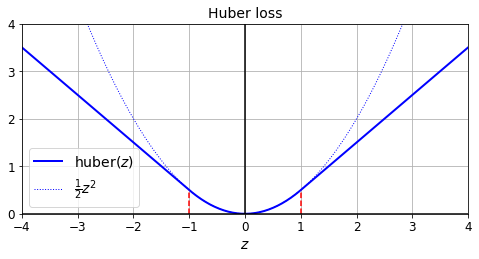

In [59]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [60]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [61]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [62]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 0s 837us/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


## 12.3.2 사용자 정의 요소를 가진 모델을 저장하고 로드하기
 - 케라스가 함수 이름을 저장하므로 사용자 정의 손실 함수를 사용하는 모델은 아무 이상 없이 저장된다.
 - 모델을 로드할 때는 함수 이름과 실제 함수를 매핑한 딕셔너리를 전달해야 한다.
 - 좀 더 일반적으로 사용자 정의 객체를 포함한 모델을 로드할 때는 그 이름과 객체를 매핑해야 한다.

In [63]:
model.save("images/model/my_model_with_a_custom_loss.h5")

In [64]:
model = keras.models.load_model("images/model/my_model_with_a_custom_loss.h5",
                               custom_objects = {"huber_fn" : huber_fn})

In [65]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 0s 815us/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


* 앞서 구현한 함수는 -1과 1사이의 오차는 작은 것으로 간주한다.
* 따라서 다른 기준이 필요할 때는 매개변수를 받을 수 있는 함수를 만드는 것이다.

In [66]:
def create_huber(threshold = 1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.abs(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold **2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [67]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [68]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2750 - mae: 0.4838 - val_loss: 0.3146 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 0s 815us/step - loss: 0.2713 - mae: 0.4776 - val_loss: 0.2916 - val_mae: 0.4800


In [69]:
model.save("images/model/my_model_with_a_custom_loss_threshold_2.h5")

In [70]:
#model을 저장할 때 이 threshold 값은 저장되지 않는다.
#따라서 model을 로드할 때 thresholde 값을 지정해야 한다.
model = keras.models.load_model("images/model/my_model_with_a_custom_loss_threshold_2.h5",
                               custom_objects={"huber_fn" : create_huber(2.0)})

In [71]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2679 - mean_absolute_error: 0.4734 - val_loss: 0.2700 - val_mean_absolute_error: 0.4650
Epoch 2/2
363/363 [==============================] - 0s 815us/step - loss: 0.2654 - mean_absolute_error: 0.4697 - val_loss: 0.2517 - val_mean_absolute_error: 0.4558


In [72]:
# 위와같은 문제는 keras.losses.Loss 클래스를 상속하고, get_config() 메서드를 구현하여 해결
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold = 1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
        

 - 생성자는 기본적인 하이퍼파라미터를 **kwargs로 받은 매개변수 값을 부모 클래스의 생성자에게 전달
 - 손실 함수의 name과 개별 샘플의 손실을 모으기 위해 사용할 reduction 알고리즘
 - call()메서드는 레이블과 예측을 받고 모든 샘플의 손실을 계산하여 반환
 - get_config()메서드는 하이퍼파라미터 이름과 같이 매핑된 딕셔너리를 반환

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [74]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [75]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.7095 - mae: 0.8863 - val_loss: 0.3378 - val_mae: 0.5485
Epoch 2/2
363/363 [==============================] - 0s 793us/step - loss: 0.2416 - mae: 0.5083 - val_loss: 0.2660 - val_mae: 0.5089


In [76]:
model.save("images/model/my_model_with_a_custom_loss_class.h5")

In [77]:
model = keras.models.load_model("images/model/my_model_with_a_custom_loss_class.h5",
                               custom_objects={"HuberLoss": HuberLoss})

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2286 - mean_absolute_error: 0.4970 - val_loss: 0.2120 - val_mean_absolute_error: 0.4723
Epoch 2/2
363/363 [==============================] - 0s 815us/step - loss: 0.2216 - mean_absolute_error: 0.4904 - val_loss: 0.2045 - val_mean_absolute_error: 0.4725


## 12.3.3 활성화 함수, 초기화 규제, 제한을 커스터마이징하기

* 사용자 정의 활성화 함수

In [79]:
#사용자 정의 활성화 함수
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

#사용자 정의 글로럿 초기화
def my_glorot_initializer(shape, dtype = tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev = stddev, dtype =dtype)

#사용자 정의 ℓ1 규제
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

#양수인 가중치만 남기는 사용자 정의 제한
def my_positive_weights(weights): # tf.nn.relu(weights) 값을 반환합니다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [80]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
# 활성화 함수는 Dense 층의 출력에 적용되고 다음 층에 그 결과가 전달
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [83]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [84]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 859us/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [85]:
model.save("images/model/my_model_with_many_custom_parts.h5")

In [86]:
model = keras.models.load_model(
    "images/model/my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [87]:
#factor 하이퍼파라미터를 저장하는 ℓ1규제를 위한 간단한 클래스
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor" : self.factor}

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [90]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [91]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 793us/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [92]:
model.save("images/model/modelmy_model_with_many_custom_parts.h5")

In [93]:
model = keras.models.load_model(
    "images/modelmy_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

## 12.3.4 사용자 정의 지표

* 손실은 모델을 훈련하기 위해 경사 하강법에서 사용하므로 미분 가능해야 하고, 그래디언트가 모든 곳에서 0이 아니어야 한다.
* 지표는 모델을 평가할 때 사용하고, 미분이 가능하지 않거나 모든 곳에서 그레이디언트가 0이어도 괜찮다.

In [94]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [96]:
#사용자 지표 함수를 만드는 것은 사용자 손실 함수를 만드는 것과 동일하다.
#후버 손실 함수는 지표로도 사용해도 잘 동작한다.
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [97]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 639us/step - loss: 2.0982 - huber_fn: 0.8819
Epoch 2/2
363/363 [==============================] - 0s 639us/step - loss: 0.6052 - huber_fn: 0.3176


* 손실과 지표에 같은 함수를 사용해도 다른 결과가 나올 수 있다. 일반저긍로는 부동 소수점 정밀도 오차 때문이다. 수학 삭이 동일하더라도 연산은 동일한 순서대로 실행되지 않는다.
* 이로 인해서 작은 차이가 발생한다. 또한 샘플 가중치를 사용하면 정밀도보다 더 큰 오차가 생긴다.
 - 에포크에서 손실은 지금까지 본 모든 배치 손실의 평균. 각 배치 손실은 가중치가 적용된 샘플 손실의 합을 배치 크기로 나눈 것.
 - 에포크에서 지표는 가중치가 적용된 샘플 손실의 합을 지금까지 본 모든 샘플 가중치의 합으로 나눈 것. 즉, 모든 샘플 손실의 가중 평균

In [98]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [99]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 0s 617us/step - loss: 0.1425 - huber_fn: 0.2908
Epoch 2/2
363/363 [==============================] - 0s 661us/step - loss: 0.1387 - huber_fn: 0.2820


In [100]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.1425308734178543, 0.14429367277259672)

* 진짜 양성 개수와 거짓 양성 개수를 기록하고 필요할 때 정밀도를 계산할 수 있는 객체가 필요하다. 그래서 keras.metrics.Precision 클래스가 하는 일이 이것이다.
* Precision 클래스는 배치마다 점진적으로 업데이트되기 때문에 이를 스트리밍 지표(Streaming Metric)라고 한다.

In [104]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [106]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [107]:
#result()메서드를 호출하여 현재 지푯값을 얻을 수 있다.
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [109]:
#variables속성을 사용하여 진짜 양성과 거짓 양성을 기록한 변수를 확인할 수도 있다.
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [110]:
#states()메서도를 사용해 이 변수를 초기화
precision.reset_states()

* 전체 후버 손실과 지금까지 처리한 샘플 수를 기록하는 클래스
 - 결과값을 요청하면 평균 후버 손실이 반환된다.

In [122]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer = "zeros")
        self.count = self.add_weight("count", initializer = "zeros")
    def update_state(self, y_true, y_pred, sample_weight = None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold" : self.threshold}
        

* add_weight() : 여러 배치에 걸쳐 지표의 상태를 기록하기 위한 변수를 만든다.
 - 후버 손실의 합(total), 지금까지 처리한 샘플 수(count)를 기록한다.
* update_state() : 이 클래스를 함수처럼 사용할 때 호출, 배치의 레이블과 예측을 바탕으로 변수를 업데이트
* result() : 최종 결과를 계산하고 반환. 위 예에선ㄴ 모든 샘플에 대한 평균 후버 손실값
* get_config() : 메서드를 구현하여 threshold 변수를 모델과 함께 저장
* reset_status() : 기본적으로 모든 변수를 0.0으로 초기화

In [123]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [124]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [125]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [126]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [127]:
#HuberMetric 클래스가 잘 동작하는지 확인
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [128]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [129]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [130]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 661us/step - loss: 0.8810 - huber_metric: 0.8810
Epoch 2/2
363/363 [==============================] - 0s 727us/step - loss: 0.3128 - huber_metric: 0.3128


In [137]:
model.save("images/model/my_model_with_a_custom_metric.h5")

## 12.3.5 사용자 정의 층

* 텐서플로에는 없는 특이한 층을 가진 네트워크를 만들어야 할 때가 있다. 이런 경우 사용자 정의 층을 만든다.
* 동일한 층 블럭이 여러번 반복되는 네트워크를 만들 경우 각각의 층 블럭을 하나의 층으로 다루는 것이 편리하다.
 - (ex [A, B, C, A, B, C, A, B, C] -> [A, B, C] = D -> [D, D, D]

In [132]:
# 가중치가 필요없는 사용자 정의 층을 만들기 위한 간단한 방법은 keras.layers.Lambda층으로 감싸는 것
exponential_layer = keras.layers.Lambda(lambda x : tf.exp(x))

In [133]:
exponential_layer([-1., 0., 1.,])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

* 상태가 있는 층(가중치를 가진 층)을 만드려면 keras.layers.Layer를 상속해야 한다.

In [134]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

* 생성자는 모든 하이퍼파라미터를 매개변수로 받는다.
 - **kwargs 부모생성자를 호출하면서 kwargs를 전달한다.
* build() : 가중치마다 add_weight() 메서드를 호출하여 층의 변수를 만든다. build 메서드의 입력으로 크기를 전달
* call() : 이 층에 필요한 연산을 수행, 위와 같은 경우 입력 X와 층의 커널을 행렬 곱셈하고 편향을 더한다. 그다음 활성화 함수를 적용한다. 이 값이 층의 출력
* compute_output_shape() 메서드는 이 층의 출력 크기를 반환. 위와 같은 경우 마지막 차원을 제외하고 입력과 크기가 같다. 마지막 차원은 이 층의 뉴런 개수이다.
* get_config() : 메서드를 구현하여 threshold 변수를 모델과 함께 저장

In [135]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [136]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 0s 640us/step - loss: 1.7899 - val_loss: 0.7606
Epoch 2/2
162/162 [==============================] - 0s 302us/step - loss: 0.5254


0.5253510475158691

In [138]:
model.save("images/model/my_model_with_a_custom_layer.h5")

* 여러 가지 입력을 받는 층을 만들려면 call()메서드에 모든 입력이 포함된 튜플을 매개변수 값으로 전달해야 한다.
* 비슷하게 compute_output_shape() 메서드의 매개변수도 각 입력의 배치 크기를 담은 튜플이어여 한다.
* 여러 출력을 가진 층을 만들려면 call()메서드가 출력의 리스트를 반환해야 한다.
* compute_output_shape()메서드는 배치 출력 크기의 리스트를 반환해야 한다.

In [140]:
# 두 개의 입력과 세 개의 출력을 만드는 층
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return [X1 + X2, X1 * X2, X1 / X2]
    
    def comput_output_shape(self, batch_input_shape):
        b1, b2 = batch_input_shape
        return [b1, b2, b1]

In [142]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2, outputs3 = MyMultiLayer()((inputs1, inputs2))

* 훈련과 테스트에서 다르게 동작하는 층 (Dropout이나 BatchNormalization을 사용하는 층)
 - call() 메서드에 traning 매개변수를 추가하여 훈련인지 테스트인지를 결정

In [143]:
#예시로 훈련하는 동안 가우스 잡음을 추가하고 테스트 시에는 아무것도 하지 않는 층
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape
    
# 이 예시와 같은 케라스 층 : keras.layers,GaussianNoise

In [144]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 0s 640us/step - loss: 0.4813 - val_loss: 0.4088
Epoch 2/2
162/162 [==============================] - 0s 308us/step - loss: 0.4066


0.4066309332847595

# 12.3.6 사용자 정의 모델

* keras.Model 클래스를 상속하여 생성자에서 층과 변수를 만들고 모델이 해야 할 작업을 call()메서드에 구현한다.

* 사용자 정의 모델 : 스킵 연결이 있는 사용자 정의 잔차 블록(ResidualBlock)층을 가진 예제 모델
 - 입력이 첫 번째 완전 연결 층을 통과하여 두 개의 완전 연결 층과 스킵 연결로 구성된 잔차 블록(Residual Block)으로 전달
 - 동일한 잔차 블록에 세 번 더 통과
 - 두 번째 잔차 블록을 지나 마지막 출력이 완전 연결된 출력 층에 전달

In [148]:
X_new_scaled = X_test_scaled

In [145]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu", kernel_initializer = "he_normal")
                      for _ in range(n_layers)]
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [146]:
#케라스가 알아서 추적해야 할 객체가 담긴 hidden속성을 감지하고 필요한 변수를 자동으로 이 층의 변수 리스트에 추가
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

* 생성자에서 층을 만들고 call() 메서드에서 이를 사용한다.
* 이 모델은 다른 일반 모델처럼 사용할 수 있다(컴파일, 평가, 예측)
* save()메서드를 사용해 모델을 저장하고 load_model() 함수를 사용하고 싶다면 get_config메서드를 구현해야 한다.

In [149]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 0s 569us/step - loss: 85.6609
Epoch 2/5
363/363 [==============================] - 0s 558us/step - loss: 4.4534
Epoch 3/5
363/363 [==============================] - 0s 569us/step - loss: 2.8878
Epoch 4/5
363/363 [==============================] - 0s 555us/step - loss: 1.3755
Epoch 5/5
162/162 [==============================] - 0s 367us/step - loss: 1.4838


In [150]:
model.save("image/model/my_custom_model.ckpt")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: image/model/my_custom_model.ckpt\assets


In [152]:
#대신 시퀀셜 API를 사용하는 모델을 정의
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [153]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 0s 477us/step - loss: 1.0762
Epoch 2/5
363/363 [==============================] - 0s 519us/step - loss: 0.4691
Epoch 3/5
363/363 [==============================] - 0s 492us/step - loss: 0.3978
Epoch 4/5
363/363 [==============================] - 0s 470us/step - loss: 0.3826
Epoch 5/5
162/162 [==============================] - 0s 326us/step - loss: 0.5867


## 12.3.7 모델 구성 요소에 기반한 손실과 지표

* 앞서 정의한 사용자 손실과 지표는 모두 레이블과 예측을 기반으로 한다.
* 은닉층의 가중치나 활성화 함수 등과 같이 모델의 구성요소에 기반한 손실을 정의해야 할 때가 있다.
* 모델 구성 요소에 기반한 손실을 정의하고 계산하여 add_loss()메서드에 그 결과를 전달한다.
* 예를 들어 다섯 개의 은닉층과 출력층으로 구성된 회귀용 MLP 모델을 만든다.
 - 이 모델은 맨 위의 은닉층에 보조 출력을 가진다. 이 보조출략에 연결된 손실을 재구성 손실(Reconstruction loss)라고 부른다. (재구성과 입력 사이의 평균 제곱 오차)

In [154]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs, name='recon')
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        self.recon_loss = 0.05 * tf.reduce_mean(tf.square(reconstruction - inputs))
        return self.out(Z)
    
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x)
            loss = self.compiled_loss(y, y_pred, regularization_losses=[self.recon_loss])

        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        return {m.name: m.result() for m in self.metrics}

* 생성자가 다섯 개의 은닉층과 하나의 출력층으로 구성된 심층 신경망을 만든다.
* build() : 완전 연결 층을 하나 더 추가하여 모델의 입력을 재구성하는 데 사용한다.
 - 이 완전 연결 층의 유닛 개수는 입력 개수와 같아야 한다.
 - 이런 재구성 층을 build()메서드에서 만드는 이유는 이 메서드가 호출되기 전까지는 입력 개수를 알 수 없기 때문이다.
* call() : 재구성 손실을 계산하고, add_loss() 메서드를 사용해 모델의 손실 리스트에 추가
 - 재구성 손실이 주 손실을 압도하지 않도록 0.05를 곱하여 크기를 줄였다.
* call() 메서드 마지막에서 은닉층의 출력을 출력층에 전달하여 얻은 출력값을 반환
* 마지막으로 모델의 add_metric() 메서드를 호출하여 모델에 이 지표를 추가

In [155]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 0s 488us/step - loss: 0.6910
Epoch 2/2
363/363 [==============================] - 0s 492us/step - loss: 0.4208


## 12.3.8 자동 미분을 사용하여 그레이디언트 계산하기

In [161]:
def f(w1, w2):
    return 3*w1**2 + 2*w1 * w2

* 신경망은 보통 수만 개의 파라미터를 가진 매우 복잡한 함수이기 때문에 손으로 직접 도함수를 계산한다는 것은 거의 불가능한 작업이다.
* 한 가지 대안은 각 파라미터가 바뀔 때마다 함수의 출력이 얼마나 변하는지 측정하여 도함수의 근삿값을 계산하는 것이다.

In [162]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [163]:
(f(w1, w2+eps) - f(w1, w2)) / eps 

10.000000003174137

* 텐서플로에서 자동 미분 사용하기
 - 두 변수 w1과 w2를 정의하고 tf.GradientTape 블럭을 만들어 이 변수와 관련된 모든 연산을 자동으로 기록한다.
 - 이 테이프에 두 변수 [w1, w2]에 대한 z의 그레이디언트를 요청한다.
* gradient() 메서드를 호출된 후에는 자동으로 테이프가 즉시 지워진다. 따라서 gradient()메서드를 두 번 호출하면 예외가 발생된다.
 - gradient()메서드를 한 번 이상 호출해야 한다면 지속 가능한 테이프를 만들고 사용이 끝난 후 테이프를 삭제하여 리소스를 해제해야 한다.
* 기본적으로 테이프는 변수가 포함된 연산만을 기록한다. 만약 변수가 아닌 다른 객체에 대한 z의 그레이디언트를 계산하려면 None이 반환
* 필요한 어떤 텐서라도 감시하여 관련된 모든 연산을 기록하도록 강제할 수 있다. 그 다음 변수처럼 이런 텐서에 대해 그레이디언트를 계산할 수 있다.

In [165]:
#텐서플로의 자동 미분
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [166]:
with tf.GradientTape() as tape:
    z = f(w1, w2)
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

In [167]:
#리소스 해제
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

In [168]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [169]:
#변수가 아닌 다른 객체에 대한 z의 그레이디언트
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [170]:
gradients

[None, None]

In [171]:
#모든 연산을 기록하도록 강제
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [172]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

* 어떤 경우에는 신경망의 일부분에 그레이디언트가 역전파되지 않도록 막을 필요가 있다.
* tf.stop_gradient() : 정방향 계산할 때 입력을 반환, 역전파 시에는 그레이디언트를 전파하지 않는다.

In [173]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [174]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

* 큰 입력에 대한 my_softplus() 함수의 그레이디언트를 계산하면 Nan이 반환
 - 자동 미분을 사용하여 이 함수의 그레이디언트를 계산하는 것이 수치적으로 불안정하기 때문이다.
 - 부동소수점 정밀도 오류로 인해 자동 미분이 무한 나누기 무한을 계산하게 됌
 - 수치적으로 안전한 소프트 플러스(SoftPlus)의 도함수 1 / (1 + 1 / exp(x))를 해석적으로 구할 수 있다.

In [175]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

## 12.3.9 사용자 정의 훈련 반복

* fit() 메서드의 유연성이 원하는 만큼 충분하지 않을 수 있다.

In [176]:
#훈련 반복을 직접 다루기 때문에 컴파일 할 필요가 없다.
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "elu", kernel_initializer = "he_normal",
                      kernel_regularizer = l2_reg),
    keras.layers.Dense(1, kernel_regularizer = l2_reg)
])

In [177]:
#훈련 세트에서 샘플 배치를 랜덤하게 추출하는 작은 함수
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [180]:
#현재 스텝 수, 전체 스텝 횟수, 에포크 시작부터 평균 손실 등 다른 지표를 포함하여 훈련 상태를 출력하는 함수
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics, end=end)

In [181]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


In [182]:
#A fancier version with a progress bar:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [186]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [187]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [188]:
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


* 실제 적용

In [189]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [190]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.4300 - mean_absolute_error: 0.57518
Epoch 2/5
11610/11610 [==============================] - mean: 0.6696 - mean_absolute_error: 0.5279
Epoch 3/5
11610/11610 [==============================] - mean: 0.6352 - mean_absolute_error: 0.5183
Epoch 4/5
11610/11610 [==============================] - mean: 0.6398 - mean_absolute_error: 0.5189
Epoch 5/5
11610/11610 [==============================] - mean: 0.6453 - mean_absolute_error: 0.5227


* 두 개의 반복문을 중첩 : 하나는 에포크를 위해서 다른 하나는 에포크 안의 배치를 위해서
* 그 다음 훈련세트에서 배치를 랜덤하게 샘플링
* tf.GradientTape() 블럭 안에서 배치 하나를 위한 예측을 만들고 손실을 걔산한다.
 - mean_squared_error() 함수가 샘플마다 하나의 손실을 반환하기 때문에 tf.reduce_mean()함수를 사용하여 배치에 대한 평균을 계산한다.
 - 규제 손실은 하나의 스칼라 값이므로 손실을 모두 더한다.
* 그다음 테이프를 사용해 훈련 가능한 각 변수에 대한 손실의 그레이디언트를 계산한다.
 - 이를 옵티마이저에 적용하여 경사 하강법을 수행
* 다음 평균 손실과 지표를 업데이트하고 상태 막대를 출력한다.
* 매 에포크 끝에서 상태 막대를 다시 출력하여 완료를 나타내고, 줄바꿈을 수행한다. 마지막으로 평균 손실과 지표값을 초기화

In [191]:
try:
    from tqdm.notebook import trange
    from collections import OrderedDict
    with trange(1, n_epochs + 1, desc="All epochs") as epochs:
        for epoch in epochs:
            with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
                for step in steps:
                    X_batch, y_batch = random_batch(X_train_scaled, y_train)
                    with tf.GradientTape() as tape:
                        y_pred = model(X_batch)
                        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                        loss = tf.add_n([main_loss] + model.losses)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    for variable in model.variables:
                        if variable.constraint is not None:
                            variable.assign(variable.constraint(variable))                    
                    status = OrderedDict()
                    mean_loss(loss)
                    status["loss"] = mean_loss.result().numpy()
                    for metric in metrics:
                        metric(y_batch, y_pred)
                        status[metric.name] = metric.result().numpy()
                    steps.set_postfix(status)
            for metric in [mean_loss] + metrics:
                metric.reset_states()
except ImportError as ex:
    print("To run this cell, please install tqdm, ipywidgets and restart Jupyter")

# 12.4 텐서플로 함수와 그래프

In [192]:
#세 제곱을 계산하는 함수
def cube(x):
    return x**3

In [193]:
cube(2)

8

In [194]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

* tf.function()을 사용하여 텐서플로 함수(Tensorflow Function)로 바꾸기

In [195]:
tf_cube = tf.function(cube)
tf_cube

In [197]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [198]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [199]:
#tf.function 데코레이터
@tf.function
def tf_cube(x):
    return x ** 3

In [200]:
tf_cube.python_function(2)

8

* TF 함수와 콘크리트 함수

In [203]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [204]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [205]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

* 함수 정의와 그래프

In [206]:
concrete_function.graph

In [207]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [208]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [209]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [210]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [211]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [212]:
concrete_function.function_def.signature

name: "__inference_tf_cube_997362"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

## 12.4.1 오토그래프와 트레이싱

* 텐서플로가 그래프를 생성하는 방법은?
 - 먼저 파이썬의 함수의 소스 코드를 분석하여 반복분, 제어문 등을 모두 찾는다. 이 첫 단계를 오토그랲(AutoGraph)라고 부른다.
 - 함수의 코드를 분석한 후 오토그래프는 이 함수의 모든 제어문을 텐서플로 연산으로 바꾼 업그레이드된 버전을 만든다.
 - 그다음 텐서플로가 이 업그레이드된 함수를 호출한다.
 - 매개변수 값을 전달하는 대신 심볼릭 텐서(Symbolic Tensor)를 전달한다. (실제 값이 없고, 이름, 데이터 타입, 크기만 가진다)
 - 이 함수는 그래프 모드(GraphMOde)로 실행된다. 즉, 텐서플로 연사이 해당 연산을 나타내고 텐서를 출력하기 위해 그래프에 노드를 추가한다는 의미
 - 최종 그래프는 트레이싱(Tracing)과정을 통해 생성된다. 

In [213]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [214]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [215]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [216]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # no trace

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


* 오토그래프를 사용해 제어 흐름 나타내기

In [217]:
#for 문
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [218]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [219]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [220]:
#while문
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [221]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [222]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]